# Data Exploration
Checking the data format available from Yahoo finance api

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data


In [2]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['TSLA']

# Define which online source one should use
data_source = 'yahoo'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2016-01-01'
end_date = '2017-09-30'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, data_source, start_date, end_date)



In [3]:
df = panel_data.to_frame()
df = df.sort_index(ascending=True)

In [4]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,441.000000,441.000000,441.000000,441.000000,441.000000,4.410000e+02
mean,252.700385,252.700385,256.542381,248.737846,252.845918,5.377715e+06
std,60.120320,60.120320,60.607241,59.490839,60.261009,2.866793e+06
min,143.669998,143.669998,154.970001,141.050003,142.320007,1.659500e+06
25%,205.399994,205.399994,209.470001,202.500000,206.399994,3.516700e+06
50%,229.729996,229.729996,232.000000,225.580002,229.339996,4.662900e+06
75%,307.190002,307.190002,310.730011,303.480011,307.440002,6.451900e+06
max,385.000000,385.000000,389.609985,379.350006,386.690002,2.374240e+07


In [5]:
df.drop('Close', axis=1, inplace=True)

In [6]:
df.head()

,,Adj Close,High,Low,Open,Volume
Date,minor,,,,,
2015-12-31,TSLA,240.009995,243.449997,238.369995,238.509995,2715000.0
2016-01-04,TSLA,223.410004,231.380005,219.000000,230.720001,6827100.0
2016-01-05,TSLA,223.429993,226.889999,220.000000,226.360001,3186800.0
2016-01-06,TSLA,219.039993,220.050003,215.979996,220.000000,3779100.0
2016-01-07,TSLA,215.649994,218.440002,213.669998,214.190002,3554300.0


In [7]:
df.columns

Index(['Adj Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [8]:
df = df [['Adj Close', 'High', 'Low', 'Volume','Open']]

In [9]:
df.head()

,,Adj Close,High,Low,Volume,Open
Date,minor,,,,,
2015-12-31,TSLA,240.009995,243.449997,238.369995,2715000.0,238.509995
2016-01-04,TSLA,223.410004,231.380005,219.000000,6827100.0,230.720001
2016-01-05,TSLA,223.429993,226.889999,220.000000,3186800.0,226.360001
2016-01-06,TSLA,219.039993,220.050003,215.979996,3779100.0,220.000000
2016-01-07,TSLA,215.649994,218.440002,213.669998,3554300.0,214.190002


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 441 entries, (2015-12-31 00:00:00, TSLA) to (2017-09-29 00:00:00, TSLA)
Data columns (total 5 columns):
Adj Close    441 non-null float64
High         441 non-null float64
Low          441 non-null float64
Volume       441 non-null float64
Open         441 non-null float64
dtypes: float64(5)
memory usage: 22.1+ KB


In [11]:
# Import the required library
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [12]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [13]:
# load the dataset
dataset = df.values
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 441 entries, (2015-12-31 00:00:00, TSLA) to (2017-09-29 00:00:00, TSLA)
Data columns (total 5 columns):
Adj Close    441 non-null float64
High         441 non-null float64
Low          441 non-null float64
Volume       441 non-null float64
Open         441 non-null float64
dtypes: float64(5)
memory usage: 22.1+ KB


In [14]:
print(dataset[:3])
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

[[  2.40009995e+02   2.43449997e+02   2.38369995e+02   2.71500000e+06
    2.38509995e+02]
 [  2.23410004e+02   2.31380005e+02   2.19000000e+02   6.82710000e+06
    2.30720001e+02]
 [  2.23429993e+02   2.26889999e+02   2.20000000e+02   3.18680000e+06
    2.26360001e+02]]


In [15]:
dataset

array([[ 0.39920439,  0.37708831,  0.40839274,  0.04779716,  0.39362438],
       [ 0.33041895,  0.32564784,  0.32710867,  0.23400912,  0.36174651],
       [ 0.33050178,  0.30651212,  0.33130506,  0.06916211,  0.34390472],
       ..., 
       [ 0.81755273,  0.83753837,  0.83697018,  0.19928542,  0.84944957],
       [ 0.81187588,  0.80028986,  0.81556856,  0.16574363,  0.80844622],
       [ 0.81809144,  0.80851519,  0.82899706,  0.1561208 ,  0.8165486 ]])

In [16]:
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

352 89


In [17]:
train[:3]

array([[ 0.39920439,  0.37708831,  0.40839274,  0.04779716,  0.39362438],
       [ 0.33041895,  0.32564784,  0.32710867,  0.23400912,  0.36174651],
       [ 0.33050178,  0.30651212,  0.33130506,  0.06916211,  0.34390472]])

In [18]:
train[:3,0:4]

array([[ 0.39920439,  0.37708831,  0.40839274,  0.04779716],
       [ 0.33041895,  0.32564784,  0.32710867,  0.23400912],
       [ 0.33050178,  0.30651212,  0.33130506,  0.06916211]])

In [19]:
train[:3,4]

array([ 0.39362438,  0.36174651,  0.34390472])

In [20]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0:4]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 4])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [22]:
trainX[:3].shape, trainY[:3].shape

((3, 1, 4), (3,))

In [23]:
trainX= trainX[:].reshape(len(trainX),4)

In [24]:
testX= testX[:].reshape(len(testX),4)

In [25]:
trainX.shape

(350, 4)

In [26]:
testX.shape

(87, 4)

In [27]:
# A quick view of the X and Y
numpy.hstack((trainX[:3], trainY[:3].reshape(3,1)))


array([[ 0.39920439,  0.37708831,  0.40839274,  0.04779716,  0.36174651],
       [ 0.33041895,  0.32564784,  0.32710867,  0.23400912,  0.34390472],
       [ 0.33050178,  0.30651212,  0.33130506,  0.06916211,  0.3178786 ]])

In [28]:
# reshape input to be [samples, time steps, features]
print(trainX[:3])
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX[:].shape)
print(testX[:].shape)

[[ 0.39920439  0.37708831  0.40839274  0.04779716]
 [ 0.33041895  0.32564784  0.32710867  0.23400912]
 [ 0.33050178  0.30651212  0.33130506  0.06916211]]
(350, 1, 4)
(87, 1, 4)


In [29]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, 4)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
2s - loss: 0.0549
Epoch 2/100
2s - loss: 0.0100
Epoch 3/100
2s - loss: 0.0048
Epoch 4/100
2s - loss: 0.0016
Epoch 5/100
2s - loss: 5.2208e-04
Epoch 6/100
2s - loss: 3.4819e-04
Epoch 7/100
2s - loss: 3.2323e-04
Epoch 8/100
2s - loss: 3.0031e-04
Epoch 9/100
2s - loss: 2.9105e-04
Epoch 10/100
2s - loss: 2.7395e-04
Epoch 11/100
2s - loss: 2.6740e-04
Epoch 12/100
2s - loss: 2.5430e-04
Epoch 13/100
2s - loss: 2.3751e-04
Epoch 14/100
2s - loss: 2.4414e-04
Epoch 15/100
2s - loss: 2.2791e-04
Epoch 16/100
2s - loss: 2.1998e-04
Epoch 17/100
2s - loss: 2.1881e-04
Epoch 18/100
2s - loss: 2.1092e-04
Epoch 19/100
2s - loss: 2.1464e-04
Epoch 20/100
2s - loss: 2.0461e-04
Epoch 21/100
2s - loss: 2.0389e-04
Epoch 22/100
2s - loss: 2.0771e-04
Epoch 23/100
2s - loss: 2.0445e-04
Epoch 24/100
2s - loss: 2.0500e-04
Epoch 25/100
2s - loss: 2.1283e-04
Epoch 26/100
2s - loss: 2.1208e-04
Epoch 27/100
2s - loss: 2.0393e-04
Epoch 28/100
2s - loss: 1.9997e-04
Epoch 29/100
2s - loss: 2.0138e-04
Epoch 30/1

In [30]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print(testX.shape)

(87, 1, 4)


In [31]:
#print(trainX.shape)
#print(trainPredict.shape)

# Reshape to (350,5) as this is the shape we transferred earlier
trainPredict2 = numpy.hstack((trainX[:].reshape(len(trainX),4), trainPredict[:].reshape(len(trainPredict),1)))
trainY2 = numpy.hstack((trainX[:].reshape(len(trainX),4), trainY[:].reshape(len(trainY),1)))

testPredict2  = numpy.hstack((testX[:].reshape(len(testX),4), testPredict[:].reshape(len(testPredict),1)))
testY2 = numpy.hstack((testX[:].reshape(len(testX),4), testY[:].reshape(len(testY),1)))

print(trainPredict2.shape)
print(trainY2.shape)

print(testPredict2.shape)
print(trainY2.shape)
# invert predictions
trainPredict3 = scaler.inverse_transform(trainPredict2)
trainY3 = scaler.inverse_transform(trainY2)
testPredict3 = scaler.inverse_transform(testPredict2)
testY3 = scaler.inverse_transform(testY2)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY3[:,4], trainPredict3[:,4]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY3[:,4], testPredict3[:,4]))
print('Test Score: %.2f RMSE' % (testScore))


(350, 5)
(350, 5)
(87, 5)
(350, 5)
Train Score: 3.22 RMSE
Test Score: 6.33 RMSE


In [32]:
testPredict3.shape

(87, 5)

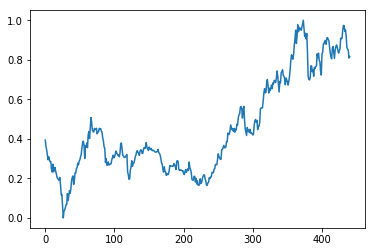

In [33]:
plt.plot(dataset[:,4])

(441, 1)
[[ 239.7750124 ]
 [ 223.09036583]
 [ 222.74634124]]
(441, 1)


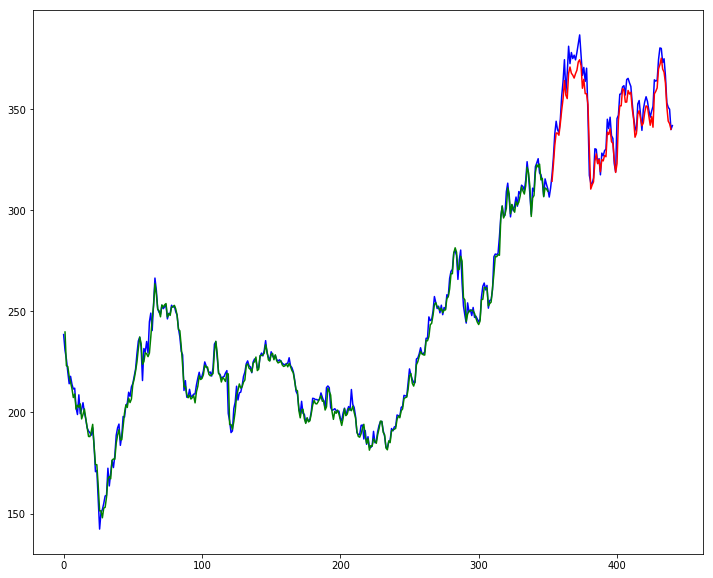

In [38]:
# shift train predictions for plotting
dataset2 = scaler.inverse_transform(dataset)
datasetplot= dataset2[:,4]
datasetplot = datasetplot.reshape(len(datasetplot),1)
print(datasetplot.shape)
#datasetplot.reshape(len(datasetplot,1))


trainPredictPlot = numpy.empty_like(datasetplot)
trainPredictPlot[:, :] = numpy.nan
trainPredict4 = trainPredict3[:,4]
trainPredict4 = trainPredict4.reshape(len(trainPredict4),1)
print(trainPredict4[:3])
trainPredictPlot[look_back:len(trainPredict4)+look_back, :] = trainPredict4
print(trainPredictPlot.shape)

#print(dataset.shape)
#print(testPredict3.shape)
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(datasetplot)
testPredictPlot[:, :] = numpy.nan
testPredict4 = testPredict3[:,4]
testPredict4 = testPredict4.reshape(len(testPredict4),1)
testPredictPlot[len(trainPredict4)+(look_back*2)+1:len(dataset)-1, :] = testPredict4
# plot baseline and predictions
plt.figure(figsize=(12,10))
plt.plot(datasetplot, color='blue')
plt.plot(trainPredictPlot, color='green')
plt.plot(testPredictPlot, color='red')
plt.show()

In [46]:
print(numpy.hstack((datasetplot[10:],testPredictPlot[10:])))

[[ 198.970001             nan]
 [ 208.710007             nan]
 [ 199.399994             nan]
 [ 201.550003             nan]
 [ 204.800003             nan]
 [ 200.059998             nan]
 [ 196.699997             nan]
 [ 192.380005             nan]
 [ 190.789993             nan]
 [ 189.949997             nan]
 [ 188.759995             nan]
 [ 192.419998             nan]
 [ 183.589996             nan]
 [ 170.699997             nan]
 [ 171.300003             nan]
 [ 157.100006             nan]
 [ 142.320007             nan]
 [ 150.5                  nan]
 [ 152.                   nan]
 [ 155.                   nan]
 [ 158.699997             nan]
 [ 159.                   nan]
 [ 172.419998             nan]
 [ 163.660004             nan]
 [ 170.119995             nan]
 [ 176.160004             nan]
 [ 172.75                 nan]
 [ 178.649994             nan]
 [ 188.699997             nan]
 [ 192.399994             nan]
 [ 194.25                 nan]
 [ 183.729996             nan]
 [ 188.2